In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import math
from params import user, password

In [2]:
con = psycopg2.connect(dbname="sql-challenge", user=user, password=password)
cur = con.cursor()

# Create a histogram to visualize the most common salary ranges for employees

In [3]:
# Execute query
cur.execute("select * from salaries")
salaries = cur.fetchall()

# Limit responses using loop (rather than LIMIT)
head = 10
for index, salary in enumerate(salaries):
    print(f'{salary[1]}')
    
    if index == head:
        break

60117
65828
40006
40054
78228
40000
56724
46671
60929
72488
42365


In [4]:
# Create a DataFrame from query results
cols_1 = ['emp_no', 'salary']
salaries_df = pd.DataFrame(data= salaries, columns=cols_1)
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


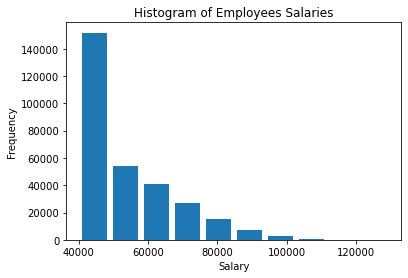

In [5]:
# Create a histogram (10 bins) of employee salary distribution    
plt.hist(salaries_df['salary'], bins = 10, histtype='bar', rwidth=0.8)
plt.title('Histogram of Employees Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Create a bar chart of average salary by title.

In [6]:
# Execute query
cur.execute("select * from employees")
employees = cur.fetchall()

In [7]:
# Create a DataFrame from query results
cols_2 = ['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name', 'sex', 'hire_date']
employees_df = pd.DataFrame(data= employees, columns=cols_2)
employees_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [8]:
merge_df = pd.merge(employees_df, salaries_df, on="emp_no")
merge_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [9]:
cur.execute("select * from titles")
titles = cur.fetchall()

In [10]:
cols_3 = ['emp_title_id', 'title']
titles_df = pd.DataFrame(data= titles, columns=cols_3)
titles_series = titles_df['title']
titles_df

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [11]:
# Group by title and retrieve titles
avg_salaries = merge_df.groupby(['emp_title_id'])['salary'].mean().to_frame()
avg_salaries = pd.merge(avg_salaries, titles_df, on="emp_title_id")
avg_salaries

,emp_title_id,salary,title
0,e0001,48564.434447,Assistant Engineer
1,e0002,48535.336511,Engineer
2,e0003,48506.799871,Senior Engineer
3,e0004,48582.896092,Technique Leader
4,m0001,51531.041667,Manager
5,s0001,58465.382850,Staff
6,s0002,58550.172704,Senior Staff


(43486.0, 63572.0)

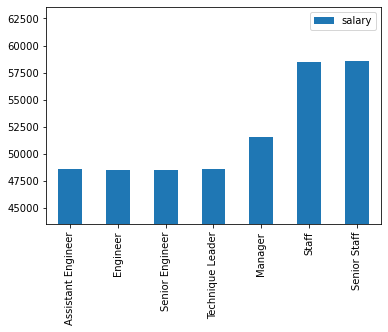

In [12]:
# Create bar chart
avg_salaries.plot(kind="bar")

plt.xticks(avg_salaries.index,avg_salaries["title"].values)
plt.ylim(30000, 60000)

low = min(avg_salaries['salary'])
high = max(avg_salaries['salary'])
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

In [13]:
con.close()